In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
classes=data["class"].value_counts()
print(classes)

class
e    4208
p    3916
Name: count, dtype: int64


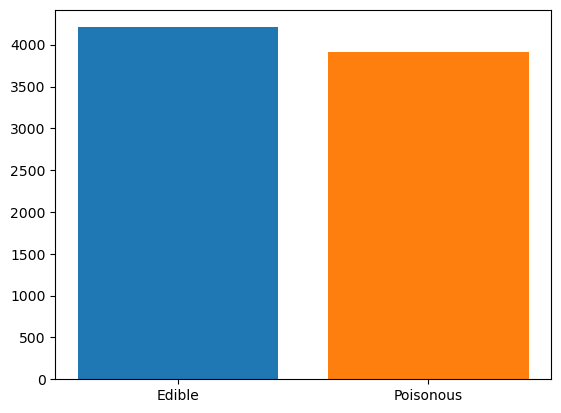

In [5]:
plt.bar("Edible",classes["e"])
plt.bar("Poisonous",classes["p"])
plt.show()

Features and Labels

In [6]:
X=data.loc[:,["cap-shape","cap-color","ring-number","ring-type"]]
y=data.loc[:,"class"]

Converting the values

In [7]:
encoder=LabelEncoder()
for i in X.columns:
  X[i]=encoder.fit_transform(X[i])
y=encoder.fit_transform(y)

In [8]:
print(X)

      cap-shape  cap-color  ring-number  ring-type
0             5          4            1          4
1             5          9            1          4
2             0          8            1          4
3             5          8            1          4
4             5          3            1          0
...         ...        ...          ...        ...
8119          3          4            1          4
8120          5          4            1          4
8121          2          4            1          4
8122          3          4            1          0
8123          5          4            1          4

[8124 rows x 4 columns]


In [9]:
print(y)

[1 0 0 ... 0 1 0]


Split the data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


Creating and training models

In [11]:
logistic_classifier_model=LogisticRegression()
ridge_classifier_model=RidgeClassifier()
decision_tree_model=DecisionTreeClassifier()
naive_bayes_model=GaussianNB()
neural_network_model= MLPClassifier()

Train models

In [12]:
logistic_classifier_model.fit(X_train,y_train)
ridge_classifier_model.fit(X_train,y_train)
decision_tree_model.fit(X_train,y_train)
naive_bayes_model.fit(X_train,y_train)
neural_network_model.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
Predict

In [13]:
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred=logistic_classifier_model.predict(X_test)


# Make prediction using the test dataset on Ridge Classifier model
ridge_pred=ridge_classifier_model.predict(X_test)


# Make prediction using the test dataset on Decision Tree model
tree_pred=decision_tree_model.predict(X_test)


# Make prediction using the test dataset on Naive Bayes model
naive_bayes_pred= naive_bayes_model.predict(X_test)


# Make prediction using the test dataset on Neural Network model
neural_network_pred=neural_network_model.predict(X_test)

Comparing the performances

In [14]:
# Create a Classification Report for Logistic Classifier model
logistic_report= classification_report(y_test,logistic_pred)



# Create a Classification Report for Ridge Classifier model
ridge_report= classification_report(y_test,ridge_pred)



# Create a Classification Report for Decision Tree model
tree_report=classification_report(y_test,tree_pred)


# Create a Classification Report for Naive Bayes model
naive_bayes_report=classification_report(y_test,naive_bayes_pred)


# Create a Classification Report for Neural Network model
neural_network_report=classification_report(y_test,neural_network_pred)

In [16]:

print("**Logistic Regression***")
print(logistic_report)



print("** Ridge Regression***")
print(ridge_report)



print("Decision Tree")
print(tree_report)



print("Naive Bayes")
print(naive_bayes_report)



print("Neural Network")
print(neural_network_report)

**Logistic Regression***
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1212
           1       0.79      0.77      0.78      1226

    accuracy                           0.78      2438
   macro avg       0.78      0.78      0.78      2438
weighted avg       0.78      0.78      0.78      2438

** Ridge Regression***
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1212
           1       0.79      0.77      0.78      1226

    accuracy                           0.78      2438
   macro avg       0.78      0.78      0.78      2438
weighted avg       0.78      0.78      0.78      2438

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1212
           1       0.90      0.91      0.91      1226

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg

Evaluation


In [17]:
# Create Random Forest Classifier object, train it and make predicitons
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
random_forest_pred=random_forest_model.predict(X_test)

In [18]:
# Create a classification Report for Random Forest model
random_forest_report=classification_report(y_test,random_forest_pred)

print(random_forest_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1212
           1       0.90      0.91      0.91      1226

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

